In [1]:
import csv
import numpy as np
import os
import pandas as pd

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import ticker
from scipy.stats import spearmanr
from torch.utils.tensorboard import SummaryWriter

from src.utils import Plotting 
from src.utils import Dataloader
from src.utils import EarlyStopping

import datetime

import seaborn as sns
from sklearn.metrics import mean_absolute_error
import netCDF4 as nc

In [2]:
import matplotlib.pylab as pl

In [9]:
with np.load('/gpfs/work/sharmas/mc-snow-data/big_box.npz') as npz:
    arr = np.ma.MaskedArray(**npz)

In [3]:
with np.load('/gpfs/work/sharmas/mc-snow-data/big_box_seeded.npz') as npz:
    arr = np.ma.MaskedArray(**npz)

In [3]:
with np.load('/gpfs/work/sharmas/mc-snow-data/big_box_seeded_coll.npz') as npz:
    arr = np.ma.MaskedArray(**npz)

In [4]:
def plot_sims(dataset,x=2,y=2,tick=4,main_title="Moments for five ensemble runs",fig_size=[13,12]):
    sns.set_theme(style="darkgrid")
    var=["Lc","Nc","Lr","Nr"]
    
    fig= plt.figure()
    fig.set_size_inches(fig_size)
    c= pl.cm.jet(np.linspace(0,1,95))
    #c=["#26235b","#bc473a","#812878","#f69824","green"]
   
    for i in range(4):
        ax = fig.add_subplot(x,y, i + 1)
       
        for j in range (95):
            l=dataset[:,:,j]
            data=np.ma.compress_rows(l)
            data = np.delete(data, 3, 1)
            sns.lineplot(x=data[:,0],y=data[:,i+1],color=c[j])#label="Sim No:"+str(j+1))
        plt.title(var[i])
      
        plt.xlabel("Time")
    
    fig.suptitle(f"Lo={dataset[1,-4,0]}; rm={dataset[1,-3,0]}; nu={dataset[1,-2,0]}", fontsize="x-large")

In [34]:
arr[-1,:,4,0]

masked_array(data=[71980.0, 3.91853e-11, 203.747, 2.35547e-23,
                   0.000199702, 1.86929, 2.91908e-08, 0.0, 0.0, 0.0247926,
                   7.77986e-15, 0.0, 8.5902e-06, 27488.0, 0.0002, 9e-06,
                   2.0, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20)

In [35]:
k=np.mean(arr[:,:,-4:,0:5],axis=-1)

In [43]:
k=k[:,:,:,np.newaxis]

In [44]:
sim_data=np.delete(np.ma.compress_rows(k[:,:,0,0]),[3,6],1)

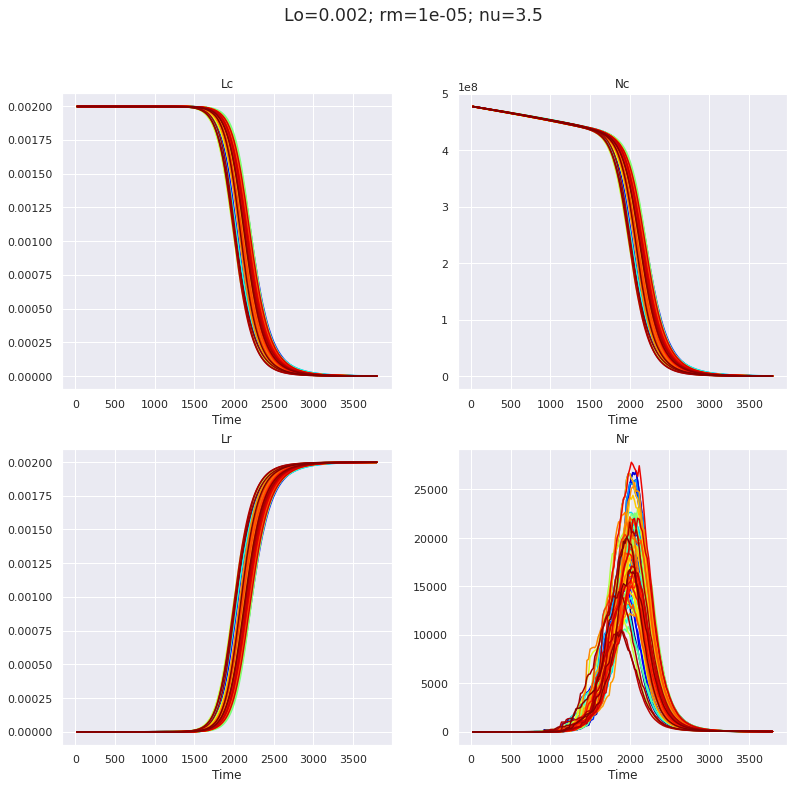

In [11]:
plot_sims(arr[0:190,:,-2,:])

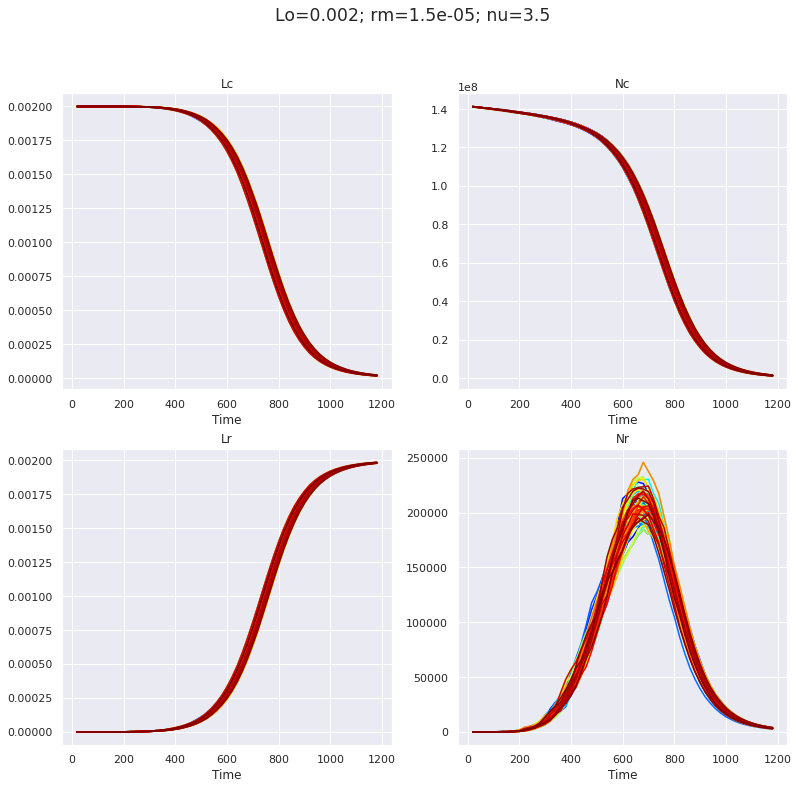

In [7]:
plot_sims(arr[:,:,-1,:])

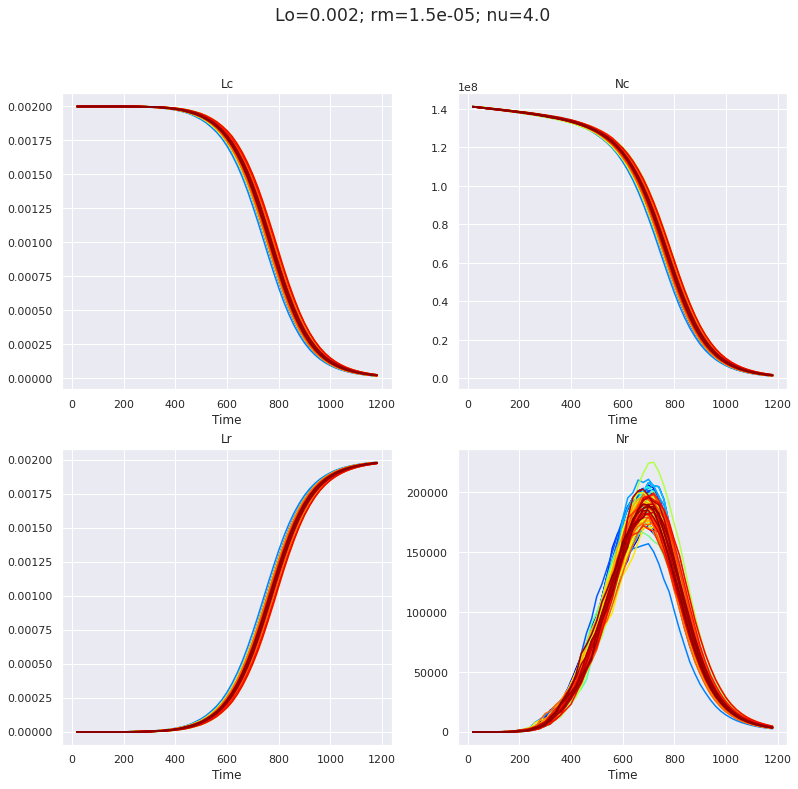

In [10]:
plot_sims(arr[:,:,-1,:])

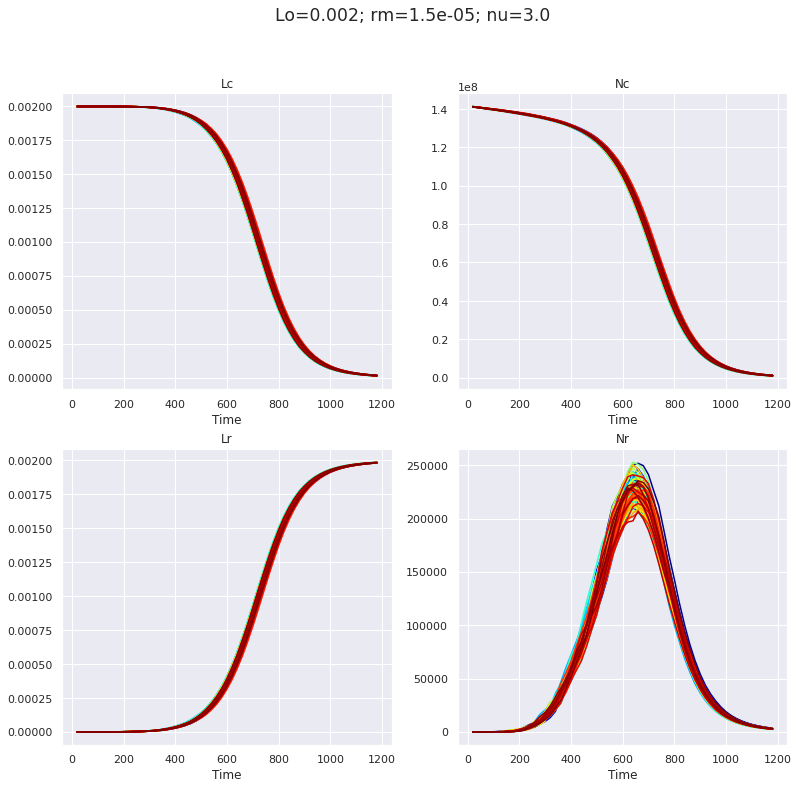

In [8]:
plot_sims(arr[:,:,-2,:])

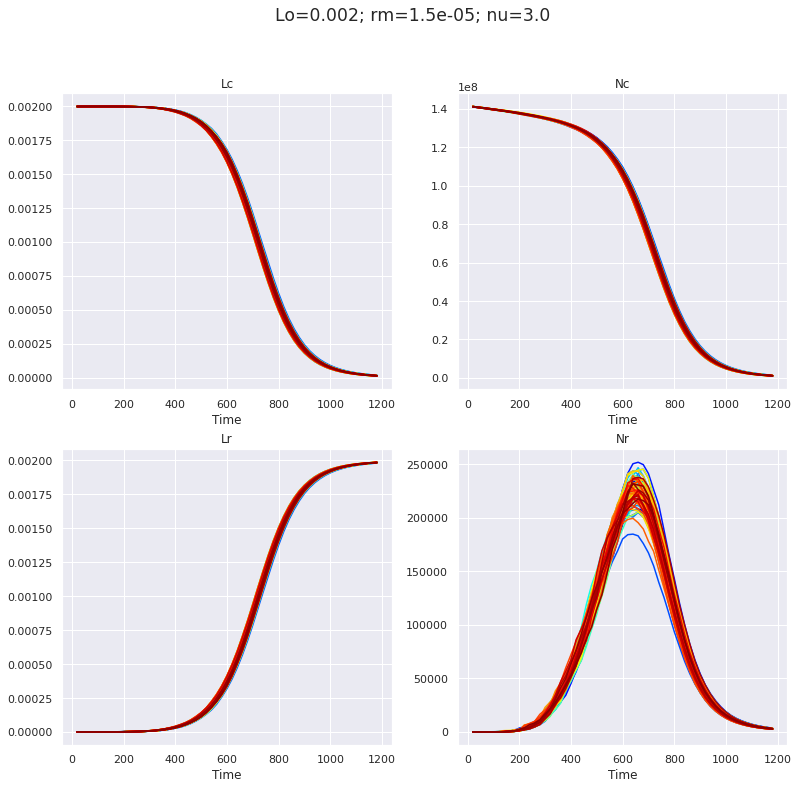

In [16]:
plot_sims(arr[:,:,-3,:])

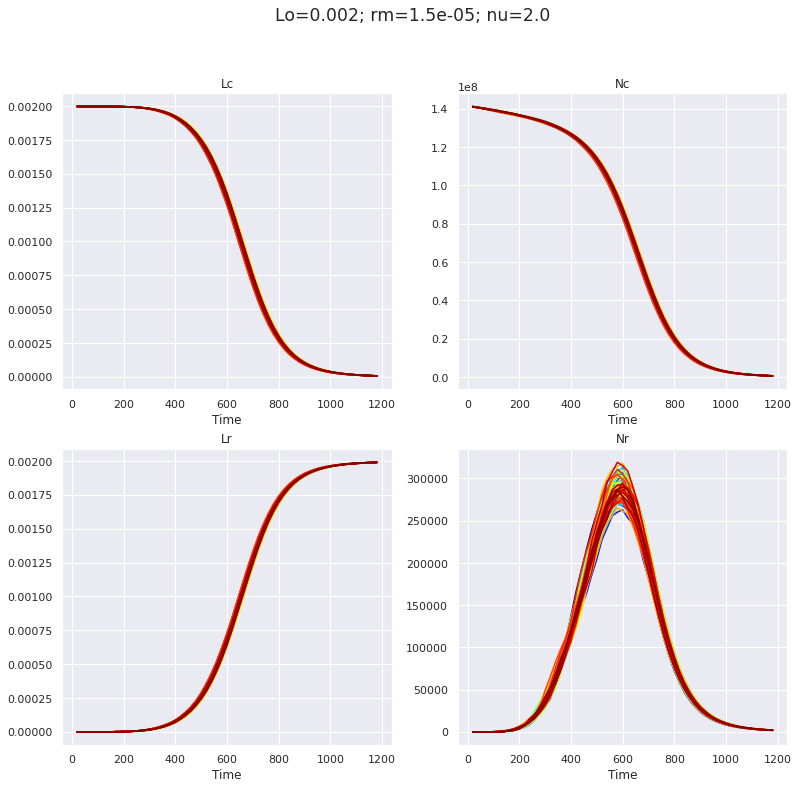

In [17]:
plot_sims(arr[:,:,-5,:])

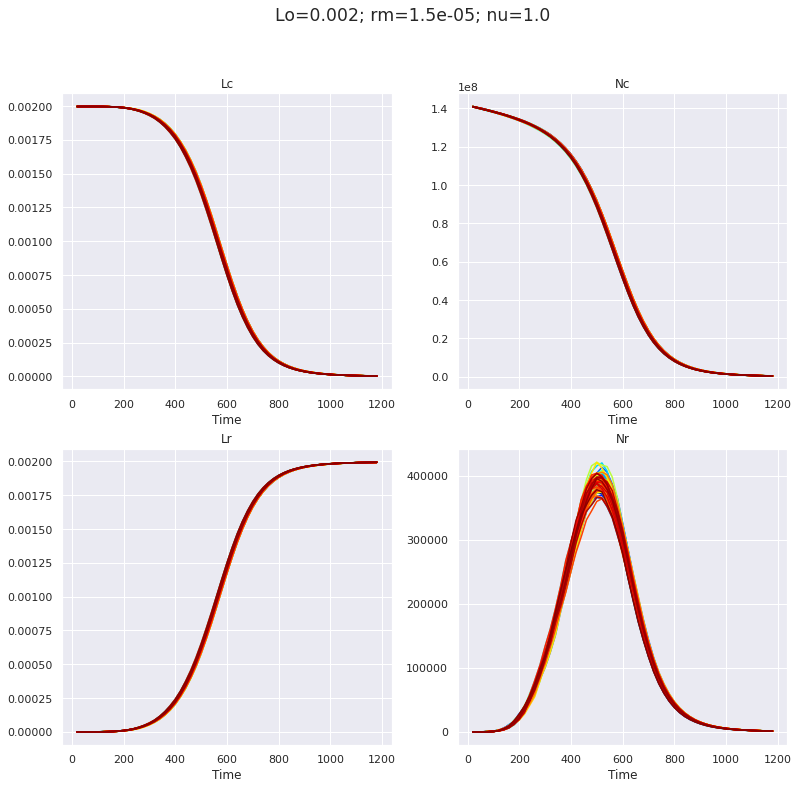

In [18]:
plot_sims(arr[:,:,-7,:])

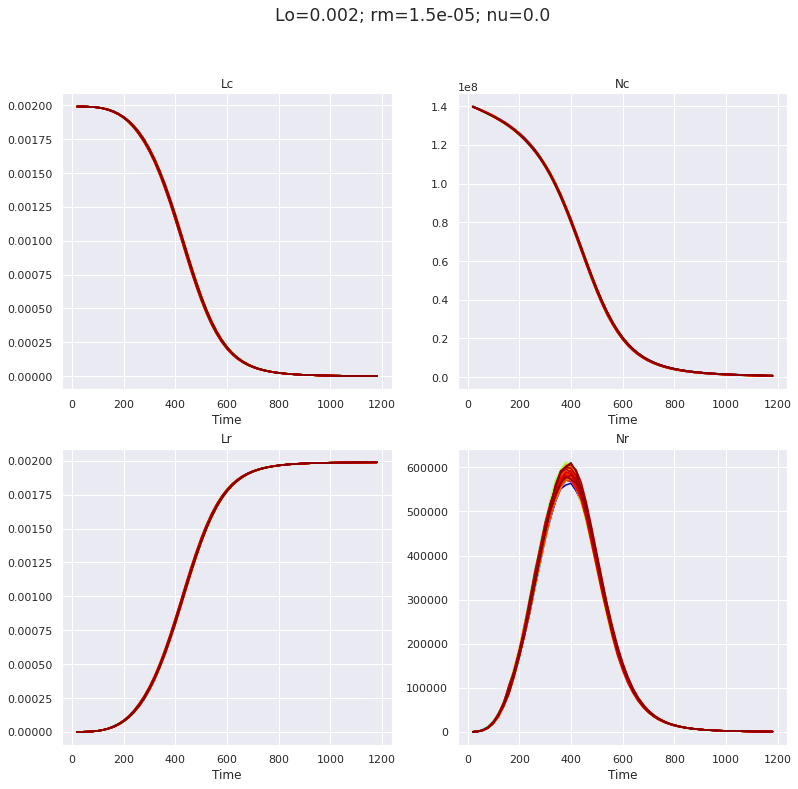

In [19]:
plot_sims(arr[:,:,-9,:])

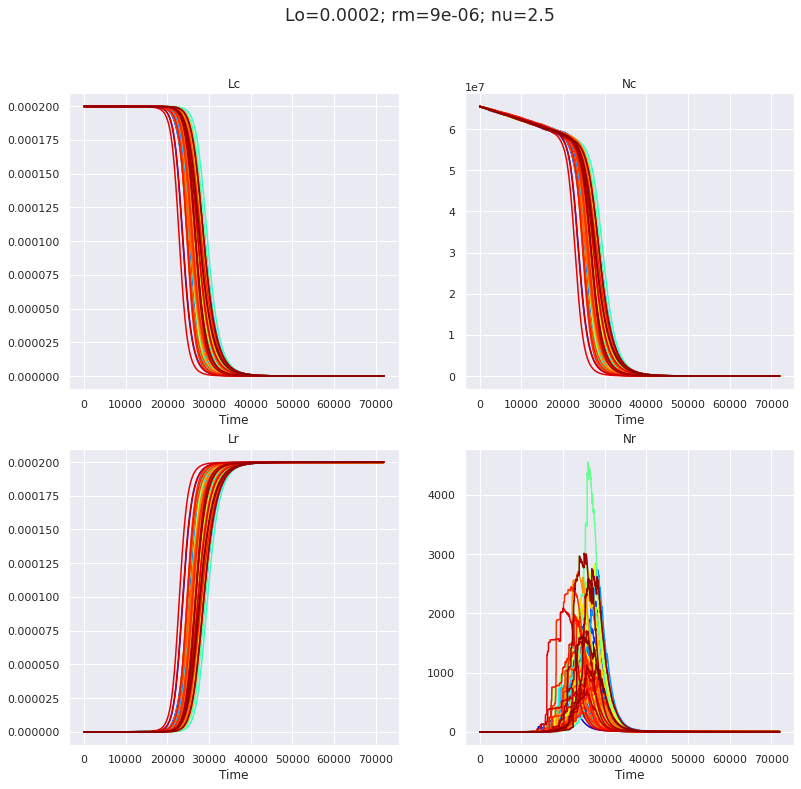

In [28]:
plot_sims(arr[:,:,5,:])

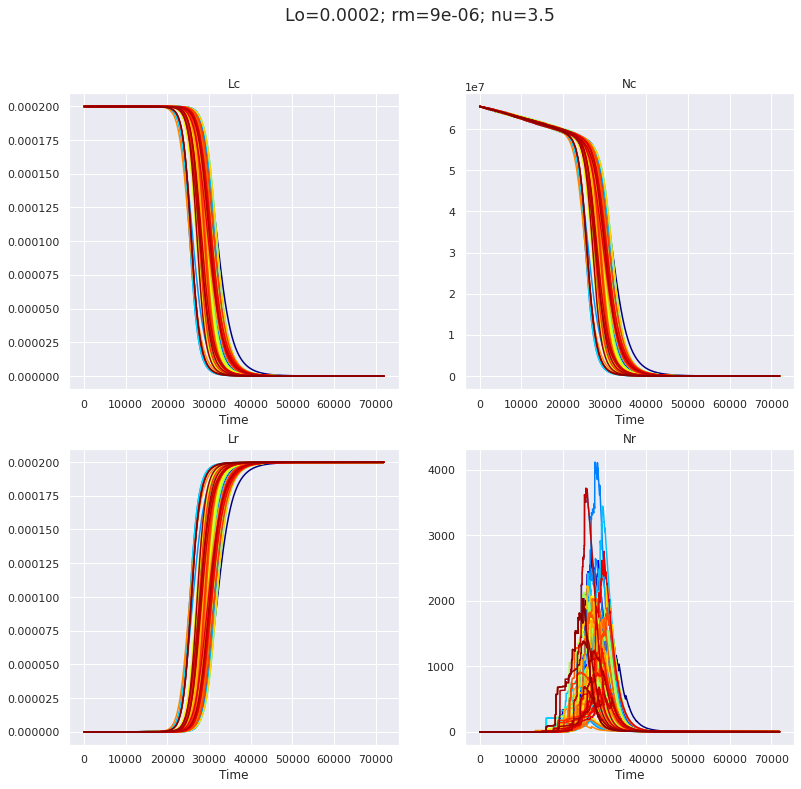

In [26]:
plot_sims(arr[:,:,7,:])

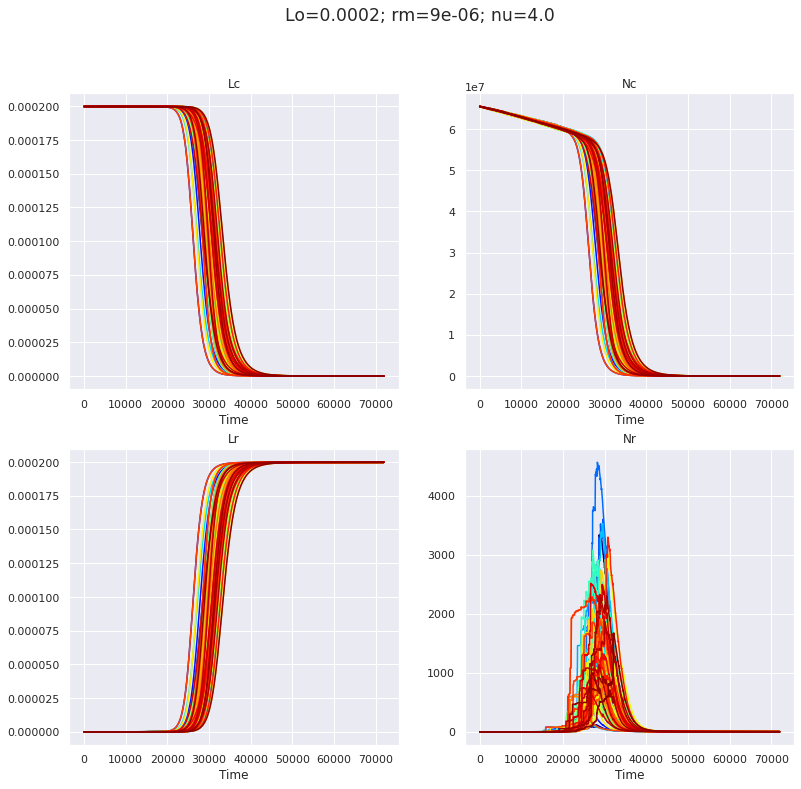

In [27]:
plot_sims(arr[:,:,8,:])

In [15]:
l.shape

(3599, 18, 100)

In [13]:
data=np.ma.compress_rows(l)

In [11]:
arr.shape

(3599, 18, 819, 100)

In [ ]:
arr[:,:]

In [14]:
arr[:,:,818,98]

masked_array(
  data=[[20.0, 0.00199754, 141181000.0, ..., 1.5e-05, 4.0, 1.0],
        [40.0, 0.00199754, 140946000.0, ..., 1.5e-05, 4.0, 1.0],
        [60.0, 0.00199754, 140682000.0, ..., 1.5e-05, 4.0, 1.0],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [8]:
data[:,0]

array([2.000e+01, 4.000e+01, 6.000e+01, ..., 7.194e+04, 7.196e+04,
       7.198e+04])

In [58]:
with np.load('/gpfs/work/sharmas/mc-snow-data/superdroplet_data_all.npz') as npz:
    arr_orig = np.ma.MaskedArray(**npz)

In [ ]:
np.ma.compress_rows(l)

In [63]:
arr_orig.shape

(3599, 18, 819, 5)

In [106]:
index=None
initial_cond=np.array(arr[0,-4:-1,0,0])
for i in range (0,819):
    
    if np.array_equal(arr_orig[0,-4:-1,i,0],initial_cond):
        index=i

In [107]:
index

152

In [103]:
initial_cond

array([4.e-04, 9.e-06])

In [89]:
arr_orig[0,-4:-1,700,0]

masked_array(data=[0.0005, 1e-05, 3.0],
             mask=[False, False, False],
       fill_value=1e+20)

In [72]:
np.array_equal(arr_orig[0,-4:-1,i,0],initial_cond)

False

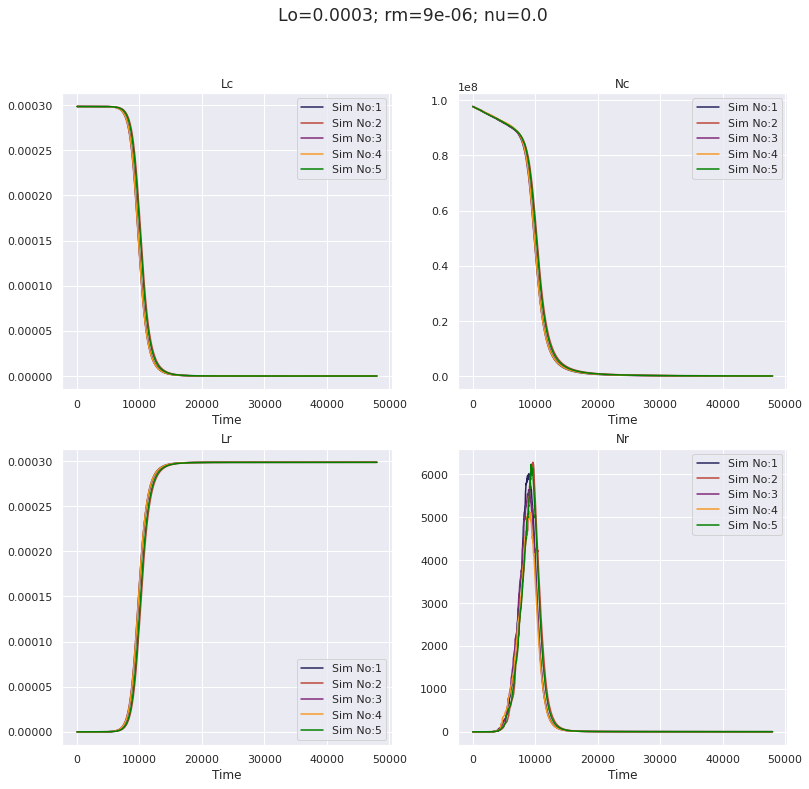

In [108]:
plot_sims(arr_orig[:,:,index,:])

In [56]:
for i in range (5):
    print(arr[1,-4:,775,i])

[0.0008 1.5e-05 2.5 1.0]
[0.0008 1.5e-05 2.5 1.0]
[0.0008 1.5e-05 2.5 1.0]
[0.0008 1.5e-05 2.5 1.0]
[0.0008 1.5e-05 2.5 1.0]


In [63]:
print(f"Lo={arr[1,-3,775,0]}")

Lo=1.5e-05gg


In [83]:
arr.shape

(3599, 18, 819, 5)

In [84]:
819*0.8


655.2

In [85]:
655*0.9

589.5

In [ ]:

column_names = ["time","Lc","Nc","Zc","Lr","Nr","Zr","auto_num","auto_mass","accr_num","accr_mass","self_cloud","self_rain","nsp", "lwc0","rm", "nu_gam", "mu_gam"]


In [100]:
#Works well
def get_tendency():
    arr_new=np.delete(arr, [3,6], 1)
   
    output_tend_all=[]
    for i in range (5):
        output_tend=[]
        for j in range(819):
            sim_data=arr_new[:,:,j,i]
            sim_data=np.ma.compress_rows(sim_data)
            output_sim=[]
            for t in range (1,len(sim_data)):
                output_sim.append((sim_data[t,1:5]-sim_data[t-1,1:5])/20)
            
            output_tend.append(output_sim)
            
        output_tend_all.append(output_tend)
        
        
    return output_tend_all
            
        
            
        
    

In [111]:
k=np.delete(arr, [3,6], 1)

In [112]:
k.shape

(3599, 16, 819, 5)

In [ ]:
k_meta=k[:-1,7:13,:,:]

In [101]:
output_tend_all=get_tendency()

In [102]:
output_tend_all=np.asarray(output_tend_all)

In [110]:
output_tend_all[0,0,:,1]

array([-7400., -6460., -7160., ...,     0.,     0.,     0.])

In [105]:
output_tend_all.shape

(5, 819, 3598, 4)

In [107]:
k=arr.reshape(5,819,3599,18)

In [109]:
k[0,0,:,1]

masked_array(data=[20.0, 20.0, 20.0, ..., 1.2e-05, 1.4e-05, 1e-05],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [277]:
def get_inputs():
    arr_new=np.ma.masked_array(np.delete(arr, [3,6], 1))
   
    input_all=[]
    meta_all=[]
    
    for i in range (5):
        inputs_sim=[]
        meta_sim=[]
        for j in range(819):
            sim_data=np.ma.masked_array(arr_new[:,:,j,i])
            #sim_data = np.ma.masked_where(np.ma.getmask(arr_new[:,:,j,i]),sim_data)
            #sim_data=np.ma.compress_rows(sim_data)
            inputs=[]
            
            meta=np.ma.masked_array(sim_data[:-1,7:13])
            
            tau=np.ma.masked_array(sim_data[:-1,3])/(np.ma.masked_array(sim_data[:-1,3])+np.ma.masked_array(sim_data[:-1,1]))
            xc=sim_data[:-1,1]/sim_data[:-1,2]
                
            inputs=np.concatenate((sim_data[:-1,1:5],tau.reshape(-1,1),xc.reshape(-1,1),sim_data[:-1,-4:-1]),axis=1)
            
            inputs_sim.append(np.ma.masked_array(inputs))
            meta_sim.append(np.ma.masked_array((meta)))
        input_all.append(np.ma.masked_array(inputs_sim))
        meta_all.append(meta_sim)
        #call norm fucntion here and return to self values
        
    return input_all,meta_all
            
    

In [ ]:

def _norm(data):
    a=np.mean(input_all[0,:,:,:],axis=0)
    b_mean=np.mean(a,axis=0)
    
    a=np.std(input_all[0,:,:,:],axis=0)

    b_std=np.std(a,axis=0)
    
    new_data=(input_all-b_mean)/b_std
    
    return new_data #here return to self values 
    

In [278]:
input_all,meta_all=get_inputs()

In [279]:
np.asarray(input_all,dtype=object).shape

(5, 819, 3598, 9)

In [241]:
input_all[0,0,:,:].shape

(3598, 9)

In [280]:
np.ma.compress_rows(np.asarray(input_all)[0,0,:,:]).shape

(3598, 9)

In [125]:
input_all=np.asarray(input_all)

In [126]:
input_all.shape

(5, 819, 3598, 9)

In [270]:
sim_data=np.ma.masked_array(arr[:,:,0,0])
#sim_data=np.ma.compress_rows(sim_data)

In [271]:
sim_data.shape

(3599, 18)

In [281]:
np. ma.getmask(input_all).shape

()

In [171]:
a=np.mean(input_all[0,:,:,:],axis=0)
b_mean=np.mean(a,axis=0)
#b_mean=np.mean(b,axis=0)

In [172]:
a=np.std(input_all[0,:,:,:],axis=0)

b_std=np.std(a,axis=0)

In [148]:
input_all[0,0,:,:4]`bb

array([[9.98348000e-04, 7.05922000e+07, 2.60654000e-15, 9.60000000e-06],
       [9.98348000e-04, 7.04442000e+07, 1.66183000e-13, 6.24400000e-04],
       [9.98348000e-04, 7.03150000e+07, 9.90293000e-13, 3.37960000e-03],
       ...,
       [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
       [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
       [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, 9.96920997e+36]])

In [181]:
import pytorch_lightning as pl
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm

In [583]:

class my_dataset(Dataset):
    def __init__(self,inputdata,updatedata,metadata):
        self.inputdata=inputdata
        self.updatedata=updatedata
        self.metadata=metadata
               
    def __getitem__(self, index):
        return self.inputdata[index],self.updatedata[index],self.metadata[index]
    def __len__(self):
        return (self.inputdata.shape[0])

In [585]:
class DataModule(pl.LightningDataModule):

    def __init__(self, data_dir= "/gpfs/work/sharmas/mc-snow-data/", 
                 batch_size: int = 256, num_workers: int = 0, transform=None,tot_len=819,test_len=100):
        super().__init__()
        
        
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.transform = transform

        self.inputs=None
        self.updates=None
        self.outputs=None

        self.meta=None
        self.arr=None
        self.test_len=test_len
        self.tot_len=tot_len
    
    def setup(self):
        os.chdir(self.data_dir)
        with np.load('superdroplet_data_all.npz') as npz:
            self.arr = np.ma.MaskedArray(**npz)
        
        self.get_tendency()
        self.get_inputs()
        self.test_train()
        
        
        
    def calc_mask(self,unmaksed,start=0):
        print(unmaksed.shape)
        cols=unmaksed.shape[3]
        rows=unmaksed.shape[2]
        m=(self.arr[start:rows+start,:cols,:,:])
        print(m.shape)
        print(unmaksed.shape)
        return m
        
    #Works well
    def get_tendency(self):
        #arr_new=np.delete(self.arr, [3,6], 1)
        
        output_tend_all=[]
        for i in range (5):
            output_tend=[]
            for j in range(819):
                
                   
                #sim_data=self.arr[:,:,j,i]
                sim_data=np.delete(np.ma.compress_rows(self.arr[:,:,j,i]),[3,6],1)
                output_sim=[]
                for t in range (1,len(sim_data)):
                    output_sim.append((sim_data[t,1:5]-sim_data[t-1,1:5])/20)

                output_tend.append(output_sim)

            output_tend_all.append(output_tend)
       
        self.st=np.asarray(output_tend_all)
        #mask_array=self.calc_mask(np.asarray(output_tend_all))
     
        self.sim_dataset_updates=np.asarray(output_tend_all)[:,self.tot_len-self.test_len]
        
        
        self.updates,self.updates_mean, self.updates_std=self.norm(np.asarray(output_tend_all))

        print("Calculated tendencies")
            
        
    def get_inputs(self):
        #arr_new=np.delete(self.arr, [3,6], 1)

        input_all=[]
        meta_all=[]
        output_all=[]
        

        for i in range (5):
            inputs_sim=[]
            meta_sim=[]
            outputs_sim=[]
            for j in range(819):
                
                sim_data=np.delete(np.ma.compress_rows(self.arr[:,:,j,i]),[3,6],1)
                #sim_data=arr_new[:,:,j,i]
                #sim_data=np.ma.compress_rows(sim_data)
                inputs=[]

                meta=sim_data[:-1,7:13]

                tau=sim_data[:-1,3]/(sim_data[:-1,3]+sim_data[:-1,1])
                xc=sim_data[:-1,1]/sim_data[:-1,2]

                inputs=np.concatenate((sim_data[:-1,1:5],tau.reshape(-1,1),xc.reshape(-1,1),sim_data[:-1,-4:-1]),axis=1)
                outputs=sim_data[1:,1:5]
                inputs_sim.append(inputs)
                meta_sim.append(meta)
                outputs_sim.append(outputs)
                
            input_all.append(inputs_sim)
            meta_all.append(meta_sim)
            output_all.append(outputs_sim)
        #call norm fucntion here and return to self values
        
        #mask_array=self.calc_mask(np.asarray(input_all))
        self.inputs,self.inputs_mean,self.inputs_std=self.norm(np.asarray(input_all))
        #self.inputs=self.norm(np.asarray(input_all),mask_array,do_norm=0)
        
        #mask_array=self.calc_mask(np.asarray(meta_all))
        self.meta,self.meta_mean,self.meta_std=self.norm(np.asarray(meta_all))
        print("Inputs Created")
        
        
        self.sim_dataset_inputs=np.asarray(input_all)[:,self.tot_len-self.test_len:]
        self.sim_dataset_meta=np.asarray(meta_all)[:,self.tot_len-self.test_len:]
    
    
        #mask_array=self.calc_mask(np.asarray(output_all),start=1)
        self.outputs,self.outputs_mean,self.outputs_std=self.norm(np.asarray(output_all))
        self.sim_dataset_output=np.asarray(output_all)[:,self.tot_len-self.test_len:]
    
    
        print("Created Outputs")
        
    
    def norm(self,data,do_norm=1):
        norm_data=None
        for i in range (819):
            if i== (self.tot_len-self.test_len):
       
                print ("Testing Dataset starts here")
                print(norm_data.shape)  
                self.start_test=norm_data.shape[0]
            for j in range (5):
               
                    
                k=data[j,i]
                #new_x = np.ma.masked_array(sim_data, masked_data.mask[:,:,i,j])
                #k=np.ma.compress_rows(new_x)
                if norm_data is None:
                    norm_data=k
                    
                    
                    
                else:
                    norm_data=np.concatenate((norm_data,k),axis=0)
                    
                   
        
        
        if do_norm==1:
            b_mean=np.mean(norm_data,axis=0)



            b_std=np.std(norm_data,axis=0)

            new_data=(norm_data-b_mean)/b_std

            return new_data,b_mean, b_std
        
        else:
            return norm_data
    
    
    def test_train(self):
         
            
        
            
            self.test_dataset=my_dataset(self.inputs[self.start_test:,:],self.meta[self.start_test:,:],self.updates[self.start_test:,:])
            self.dataset=my_dataset(self.inputs[:self.start_test,:],self.meta[:self.start_test,:],self.updates[:self.start_test,:])
            
        
      
            
            shuffle_dataset = True


            # Creating data indices for training and validation splits:
            

            
            train_size = int(0.9 * self.start_test)
            val_size = self.start_test - train_size
          

            self.train_dataset, self.val_dataset = torch.utils.data.random_split(self.dataset, [train_size, val_size])
        
            print("Train Test Val Split Done")
    
    
  
        
    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=self.batch_size, num_workers=self.num_workers,
                          shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=self.num_workers,
                          shuffle=False)

    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=self.batch_size, num_workers=self.num_workers,
                          shuffle=False)

                
        
        


In [586]:
data_module = DataModule(batch_size=256,num_workers=40)
data_module.setup()


Testing Dataset starts here
(1764725, 4)
Calculated tendencies
Testing Dataset starts here
(1764725, 9)
Testing Dataset starts here
(1764725, 6)
Inputs Created
Testing Dataset starts here
(1764725, 4)
Created Outputs
Train Test Val Split Done


In [566]:
 train_size = int(0.9 * data_module.start_test)
val_size = data_module.start_test - train_size
          

In [571]:
train_dataset, val_dataset = torch.utils.data.random_split(data_module.dataset, [train_size, val_size])

TypeError: 'tuple' object cannot be interpreted as an integer

In [572]:
val_size+ train_size

1764725

In [587]:
np.asarray(data_module.dataset[:,]).shape

ValueError: could not broadcast input array from shape (1764725,9) into shape (1764725)

In [582]:
np.asarray(data_module.dataset[:,0]).shape

(3, 247405)

In [233]:
k=np.ma.compress_cols(sim_data)

In [289]:
sim_data.shape

(3598, 9)

In [235]:
k.shape

(3598, 9)

In [239]:
k[800,4]

-0.0846283941356676

In [293]:
m=(data_module.arr[:-1,:9,0,0])

In [304]:
data_module.arr.shape

(3599, 18, 819, 5)

In [317]:
new_x = np.ma.masked_array(sim_data, m.mask)

In [324]:
k=np.ma.compress_rows(new_x)

In [323]:
k.shape

(119, 0)

In [298]:
m.mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [314]:
sim_data[55,:]

array([-0.01688388, -0.01688388, -0.01688388, -0.01688388])

In [376]:
np.mean(data_module.updates,axis=1)

array([-0.04486416, -0.04486416, -0.04486416, ..., -0.04486416,
       -0.04486416, 22.28950924])

In [402]:
data_module.inputs_mean

array([2.61347129e-04, 5.07171118e+07, 3.29522481e-04, 5.16026800e+03,
       5.57338712e-01, 4.84364968e-12, 5.91988067e-04, 1.08370651e-05,
       2.00005778e+00])

In [401]:
data_module.updates_std

array([2.23180874e+34, 2.23180874e+34, 2.23180874e+34, 2.23180874e+34])

In [382]:
k=np.array([[1,2],[3,4],[5,6]])

In [396]:
(data_module.updates).shape

(2016180, 4)

In [384]:
s=np.array([1,1])

In [385]:
k-s

array([[0, 1],
       [2, 3],
       [4, 5]])

In [386]:
k

array([[1, 2],
       [3, 4],
       [5, 6]])

In [427]:
data_module.updates-

array([-2.1555e-10, -1.8750e+02,  0.0000e+00, -7.2050e-03])

In [415]:
k=len(data_module.updates)

In [438]:
np.mean(data_module.updates)

1.0012821368123585e+33

In [449]:
np.mean(data_module.updates[:119,1],axis=0,dtype=np.float64)

4.1887436841961636e+33

In [450]:
data_module.updates[:118,:]

array([[ 0.00000000e+00, -7.40000000e+03,  8.17882300e-15,
         3.07400000e-05],
       [ 0.00000000e+00, -6.46000000e+03,  4.12055000e-14,
         1.37760000e-04],
       [ 0.00000000e+00, -7.16000000e+03,  3.04282035e-12,
         1.10426700e-02],
       [-5.00000000e-11, -9.50500000e+03,  8.40306500e-12,
         2.66933500e-02],
       [ 0.00000000e+00, -7.44000000e+03,  1.38487000e-11,
         4.37080000e-02],
       [ 0.00000000e+00, -6.57000000e+03,  2.05395000e-11,
         6.81760000e-02],
       [-3.00000000e-10, -7.60500000e+03,  2.93977900e-10,
         1.07076100e+00],
       [-4.00000000e-10, -4.98000000e+03,  3.82508500e-10,
         1.27189500e+00],
       [-5.50000000e-10, -8.20000000e+03,  5.45800000e-10,
         1.66333000e+00],
       [-9.00000000e-10, -7.21000000e+03,  9.14810000e-10,
         2.92662500e+00],
       [-1.50000000e-09, -4.81500000e+03,  1.47901500e-09,
         4.76265000e+00],
       [-3.00000000e-09, -9.06000000e+03,  3.01195500e-09,
      

In [451]:
(data_module.updates[:118,:]-np.mean(data_module.updates[:118,:],axis=0))/np.std(data_module.updates[:118,:],axis=0)

array([[ 8.26153872e-01,  7.31499200e-01, -8.26154276e-01,
        -1.46080842e-03],
       [ 8.26153872e-01,  7.62160811e-01, -8.26154211e-01,
        -1.46025453e-03],
       [ 8.26153872e-01,  7.39327696e-01, -8.26148337e-01,
        -1.40381546e-03],
       [ 8.26056021e-01,  6.62836761e-01, -8.26137847e-01,
        -1.32281436e-03],
       [ 8.26153872e-01,  7.30194450e-01, -8.26127189e-01,
        -1.23475394e-03],
       [ 8.26153872e-01,  7.58572750e-01, -8.26114095e-01,
        -1.10811823e-03],
       [ 8.25566765e-01,  7.24812359e-01, -8.25578969e-01,
         4.08082502e-03],
       [ 8.25371062e-01,  8.10436540e-01, -8.25405713e-01,
         5.12180699e-03],
       [ 8.25077509e-01,  7.05404211e-01, -8.25086147e-01,
         7.14770404e-03],
       [ 8.24392550e-01,  7.37696760e-01, -8.24363985e-01,
         1.36859687e-02],
       [ 8.23218335e-01,  8.15818632e-01, -8.23259821e-01,
         2.31884343e-02],
       [ 8.20282797e-01,  6.77352098e-01, -8.20259818e-01,
      

In [452]:
np.mean(data_module.updates[:118,:],axis=0)

array([-4.22147805e-07, -2.98257373e+04,  4.22147881e-07,  2.82281776e-01])

In [453]:
np.std(data_module.updates[:118,:],axis=0)

array([5.10979636e-07, 3.06572274e+04, 5.10979469e-07, 1.93215642e+02])

In [460]:
np.mean(data_module.inputs[:,2])

3.352420824076834e-13

In [479]:
data_module.updates.shape

(469421, 4)

In [463]:
data_module.updates[119:443,:]

array([[ 0.00000000e+00, -1.43000000e+04,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -1.26000000e+04,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -1.16000000e+04,  0.00000000e+00,
         0.00000000e+00],
       ...,
       [-4.04050000e-11, -5.93000000e+01,  0.00000000e+00,
        -3.41000000e-03],
       [-3.91200000e-11, -5.77450000e+01,  0.00000000e+00,
        -3.33500000e-03],
       [ 4.98460498e+35,  4.98460498e+35,  4.98460498e+35,
         4.98460498e+35]])

In [464]:
arr_new=np.delete(data_module.arr, [3,6], 1)

In [465]:
sim_data=arr_new[:,:,0,0]
sim_data=np.ma.compress_rows(data_module.arr[:,:,0,0])

In [473]:
sim_data=np.delete(np.ma.compress_rows(data_module.arr[:,:,0,0]),[3,6],1)

In [474]:
sim_data.shape

(119, 16)

In [468]:
data_module.arr[:,:,0,0]

masked_array(
  data=[[20.0, 0.000998348, 70592200.0, ..., 1.5e-05, 1.5, 1.0],
        [40.0, 0.000998348, 70444200.0, ..., 1.5e-05, 1.5, 1.0],
        [60.0, 0.000998348, 70315000.0, ..., 1.5e-05, 1.5, 1.0],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [469]:
arr_new[:,:,0,0]

masked_array(
  data=[[2.00000000e+01, 9.98348000e-04, 7.05922000e+07, ...,
         1.50000000e-05, 1.50000000e+00, 1.00000000e+00],
        [4.00000000e+01, 9.98348000e-04, 7.04442000e+07, ...,
         1.50000000e-05, 1.50000000e+00, 1.00000000e+00],
        [6.00000000e+01, 9.98348000e-04, 7.03150000e+07, ...,
         1.50000000e-05, 1.50000000e+00, 1.00000000e+00],
        ...,
        [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
         9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
        [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
         9.96920997e+36, 9.96920997e+36, 9.96920997e+36],
        [9.96920997e+36, 9.96920997e+36, 9.96920997e+36, ...,
         9.96920997e+36, 9.96920997e+36, 9.96920997e+36]],
  mask=False,
  fill_value=1e+20)

In [489]:
data_module.inputs_std

array([4.23917352e-04, 2.84433748e+07, 4.23917363e-04, 5.55802328e+04,
       4.24618943e-01, 1.50538111e-12, 8.92255020e-15, 1.15581034e-16,
       0.00000000e+00])

In [541]:
np.asarray(data_module.updates[17,:])

array([ 0.21580251,  0.11505164, -0.21575599,  0.49619085])

In [509]:
data_module.inputs[18800,-1]

1.5

In [563]:
np.asarray(data_module.dataset[:,:]).shape

ValueError: could not broadcast input array from shape (247405,9) into shape (247405)